In [1]:
# Import required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
%matplotlib inline

In [2]:
imp_df = pd.read_csv('data/impacts.csv')
orb_df = pd.read_csv('data/orbits.csv')

In [3]:
df = pd.concat([imp_df, orb_df], axis=1, sort=False)
df.columns = ['Object_Name', 'Period_Start', 'Period_End', 'Possible_Impacts',
       'Cumulative_Impact_Probability', 'Asteroid_Velocity',
       'Asteroid_Magnitude', 'Asteroid_Diameter(km)',
       'Cumulative_Palermo_Scale', 'Maximum_Palermo_Scale',
       'Maximum_Torino_Scale', 'Object_Name', 'Object_Classification',
       'Epoch(TDB)', 'Orbit_Axis(AU)', 'Orbit_Eccentricity',
       'Orbit_Inclination(deg)', 'Perihelion_Argument(deg)',
       'Node_Longitude(deg)', 'Mean_Anomoly(deg)',
       'Perihelion_Distance(AU)', 'Aphelion_Distance(AU)',
       'Orbital_Period(yr)', 'Minimum_Orbit_Intersection_Distance(AU)',
       'Orbital_Reference', 'Asteroid_Magnitude']

In [4]:
# Impact dataframe
imp_df.columns = ['Object_Name', 'Period_Start', 'Period_End', 'Possible_Impacts',
       'Cumulative_Impact_Probability', 'Asteroid_Velocity',
       'Asteroid_Magnitude', 'Asteroid_Diameter(km)',
       'Cumulative_Palermo_Scale', 'Maximum_Palermo_Scale',
       'Maximum_Torino_Scale']

imp_df.head()

,Object_Name,Period_Start,Period_End,Possible_Impacts,Cumulative_Impact_Probability,Asteroid_Velocity,Asteroid_Magnitude,Asteroid_Diameter(km),Cumulative_Palermo_Scale,Maximum_Palermo_Scale,Maximum_Torino_Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0
1,2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0
2,2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0
3,2010 VR139,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,0
4,2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0


In [5]:
# Orbit dataframe
orb_df.columns = ['Object_Name', 'Object_Classification',
       'Epoch(TDB)', 'Orbit_Axis(AU)', 'Orbit_Eccentricity',
       'Orbit_Inclination(deg)', 'Perihelion_Argument(deg)',
       'Node_Longitude(deg)', 'Mean_Anomoly(deg)',
       'Perihelion_Distance(AU)', 'Aphelion_Distance(AU)',
       'Orbital_Period(yr)', 'Minimum_Orbit_Intersection_Distance(AU)',
       'Orbital_Reference', 'Asteroid_Magnitude']

orb_df.head()

,Object_Name,Object_Classification,Epoch(TDB),Orbit_Axis(AU),Orbit_Eccentricity,Orbit_Inclination(deg),Perihelion_Argument(deg),Node_Longitude(deg),Mean_Anomoly(deg),Perihelion_Distance(AU),Aphelion_Distance(AU),Orbital_Period(yr),Minimum_Orbit_Intersection_Distance(AU),Orbital_Reference,Asteroid_Magnitude
0,433 Eros,Amor Asteroid,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16
1,719 Albert,Amor Asteroid,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50
2,887 Alinda,Amor Asteroid,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40
3,1036 Ganymed,Amor Asteroid,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45
4,1221 Amor,Amor Asteroid,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70


In [6]:
obj_list= list(imp_df['Object_Name'].head(100).unique())

Period_Start_ratio = []
for i in obj_list:
    x = imp_df[imp_df['Object_Name']==i]
    Period_Start_rate = sum(x.Period_Start)/len(x)
    Period_Start_ratio.append(Period_Start_rate)
obj_data = pd.DataFrame({'object_list': obj_list,'Period_Start_ratio':Period_Start_ratio})


new_index = (obj_data['Period_Start_ratio'].sort_values(ascending=False)).index.values
sorted_data = obj_data.reindex(new_index)

In [7]:
name_count = Counter(orb_df.Object_Name)
most_common_names = name_count.most_common(15)  
x,y = zip(*most_common_names)
x,y = list(x),list(y)

In [8]:
Period_End_ratio = []
for i in obj_list:
    x = imp_df[imp_df['Object_Name']==i]
    Period_End_rate = sum(x.Period_End)/len(x)
    Period_End_ratio.append(Period_End_rate)
dataPer = pd.DataFrame({'object_list':obj_list ,'Period_End_ratio': Period_End_ratio})

new_index = (dataPer['Period_End_ratio'].sort_values(ascending=False)).index.values
sorted_data2 = dataPer.reindex(new_index)

In [9]:
Cumulative_Impact_Probability = []
Asteroid_Velocity = []
Asteroid_Magnitude = []
Possible_Impacts = []
for i in obj_list:
    x = imp_df[imp_df['Object_Name']==i]
    Cumulative_Impact_Probability.append(sum(x.Cumulative_Impact_Probability)/len(x))
    Asteroid_Velocity.append(sum(x.Asteroid_Velocity) / len(x))
    Asteroid_Magnitude.append(sum(x.Asteroid_Magnitude) / len(x))
    Possible_Impacts.append(sum(x.Possible_Impacts) / len(x))

In [10]:
orb_df.Object_Name.dropna(inplace = True)
labels = orb_df.Object_Name.value_counts().index
colors = ['grey','blue','red','yellow','green','brown']
explode = [0,0,0,0,0,0]
sizes = orb_df.Object_Name.value_counts().values

<AxesSubplot:>

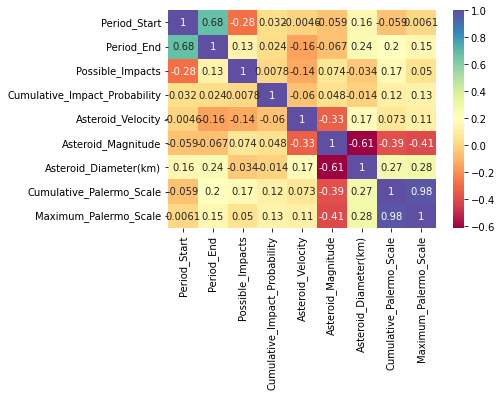

In [11]:
plt.cm.plasma
sns.heatmap(imp_df.corr(), annot=True, cmap="Spectral")

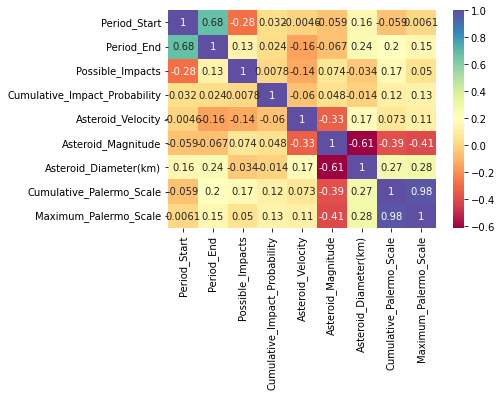

In [12]:
sns.heatmap(imp_df[imp_df.columns[:11]].corr(),annot=True,cmap="Spectral")
fig=plt.gcf()
plt.show()

/Users/adityahanumanthu/miniforge3/envs/tf_m1/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Period', ylabel='Possible_Impacts'>

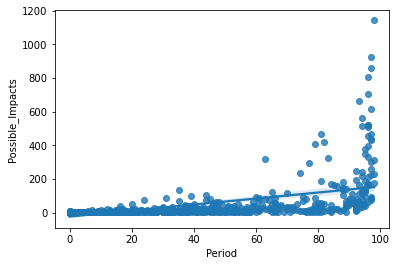

In [13]:
names = imp_df['Object_Name']
imp_df.drop(['Object_Name','Maximum_Torino_Scale','Asteroid_Magnitude'], axis=1, inplace=True)
imp_df['Period'] = imp_df['Period_End']-imp_df['Period_Start']
imp_df.drop(['Period_End', 'Period_Start','Maximum_Palermo_Scale'], axis=1, inplace=True)

x = imp_df['Period']
y = imp_df['Possible_Impacts']
sns.regplot(x,y)

/Users/adityahanumanthu/miniforge3/envs/tf_m1/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Period', ylabel='Cumulative_Palermo_Scale'>

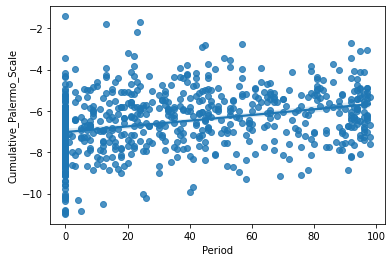

In [14]:
sns.regplot(imp_df['Period'],imp_df['Cumulative_Palermo_Scale'])

In [15]:
imp_pred = imp_df
y = imp_pred['Possible_Impacts'].values
X = imp_pred
imp_pred.head()

,Possible_Impacts,Cumulative_Impact_Probability,Asteroid_Velocity,Asteroid_Diameter(km),Cumulative_Palermo_Scale,Period
0,1,5.200000e-09,17.77,0.007,-8.31,0
1,23,7.600000e-05,8.98,0.002,-6.60,29
2,30,1.600000e-05,18.33,0.002,-6.48,45
3,24,2.000000e-07,4.99,0.016,-6.83,59
4,85,2.300000e-08,19.46,0.497,-3.85,79


In [16]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.80)

In [17]:
mlp = MLPRegressor(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=900)
mlp.fit(Xtrain, ytrain)
mlp_pred = mlp.predict(Xtest)
print(mlp.score(Xtest, ytest))

0.9999058841505567


/Users/adityahanumanthu/miniforge3/envs/tf_m1/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (900) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
preds = mlp.predict(Xtest)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(preds, ytest)))

Mean Absolute Error : 0.7716228987368365


In [19]:
rand_forest = RandomForestRegressor()
rand_forest.fit(Xtrain, ytrain)
indices = np.argsort(rand_forest.feature_importances_)[::-1]
print('Important Features:')

for f in range(imp_pred.shape[1]):
    print('%d. feature %d %s (%f)' % (f+1 , indices[f], imp_pred.columns[indices[f]],
                                      rand_forest.feature_importances_[indices[f]]))

Important Features:
1. feature 0 Possible_Impacts (0.944059)
2. feature 1 Cumulative_Impact_Probability (0.015586)
3. feature 3 Asteroid_Diameter(km) (0.012843)
4. feature 4 Cumulative_Palermo_Scale (0.011721)
5. feature 5 Period (0.008657)
6. feature 2 Asteroid_Velocity (0.007134)
